# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [2]:
# your code here
absences=pd.read_csv("../data/absences.csv")


In [3]:
age=np.array(absences["Age"])
n_absences=np.array(absences["Absences"])
print(age)
print(n_absences)


[27 61 37 23 46 58 29 36 64 40]
[15  6 10 18  9  7 14 11  5  8]


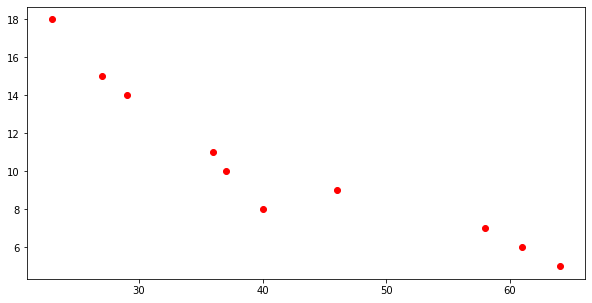

In [4]:
Fig, ax= plt.subplots(figsize=(10,5))
plt.scatter(age,n_absences,c="red")

In [5]:
# your comments here:
# We can clearly see that as the students are older they commit less absences

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [6]:
# your code here
mean_age=np.mean(age)
mean_n_absences=np.mean(n_absences)
a_ai=np.array([a-mean_age for a in age])
n_ni=np.array([n-mean_age for n in n_absences])
numerator=sum(a_ai*n_ni)
denominator=sum((a_ai)**2)
slope=numerator/denominator
intercept=mean_n_absences-slope*mean_age
print(slope)
print(intercept)

-0.2681088337033401
21.58738189891062


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [7]:
# your code here
y1=intercept+slope*mean_age
y1

10.300000000000002

In [8]:
class_abs = pd.DataFrame(age,n_absences)

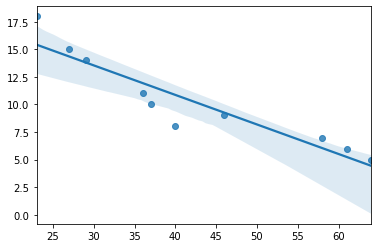

In [9]:
sns.regplot(x=age,y=n_absences,data=class_abs)

In [10]:
# your comments here
# The slope is negative because as older the students are less absences they commit. There is a negative correlation

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [11]:
# your code here
def covariance_correlation_calculatior(df_a, df_b):
    age_mean = np.mean(df_a)
    absences_mean = np.mean(df_b)
    
    xi_x = np.array([a - age_mean for a in df_a])
    yi_y = np.array([b - absences_mean for b in df_b])
    covariance = np.sum(xi_x * yi_y)/(len(df_a)-1)
    
    correlation = np.sum(xi_x * yi_y)/np.sqrt(np.sum(xi_x**2) * np.sum(yi_y**2))
    
    return covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [12]:
# your code here
covariance_correlation_calculatior(absences["Age"], absences["Absences"])


(-57.699999999999996, -0.9325434092481012)

Negative covariance as the go in different directions (goes down when they age goes up).
Also, as they go in different directions there's why it's almost a perfect negative correlation


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

Young people is more likely to don't come to work. As age increase, this trend decreases.


## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [13]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [27]:
# your code here
covariance_correlation_calculatior(ironbeers_df["X"], ironbeers_df["Y"])



(12.0, 0.9770084209183943)

The covariance is positive because the more people you tell to stay, they more likely they will.
Also, the correlation is almost perfect because they go on the same direction

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

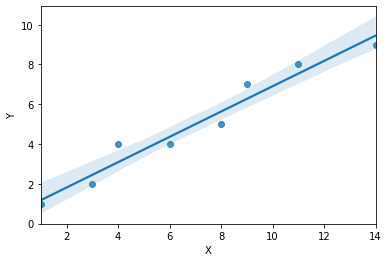

In [30]:
# your code here
sns.regplot(x=ironbeers_df["X"],y= ironbeers_df["Y"],data=ironbeers_df)

In [17]:
# your comments here

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [33]:
X=np.array(ironbeers_df["X"])
y=np.array(ironbeers_df["Y"])

In [37]:
# your code here
mean_X=np.mean(X)
mean_y=np.mean(y)
a_Xi=np.array([a-mean_age for a in X])
n_yi=np.array([n-mean_age for n in y])
numerator2=sum(a_Xi*n_yi)
denominator2=sum((a_Xi)**2)
slope2=numerator2/denominator2
intercept2=mean_y-slope*mean_X
print(slope)
print(intercept)


1.0514212941826655
-2.3599490592786587


In [38]:
# your comments here
y2=intercept2+slope2*mean_X
y2

5.0

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [20]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [21]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [22]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [23]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [24]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [25]:
# your code here

In [26]:
# your comments here